# Load Simple Workflow

## Plot

In [1]:
from python_workflow_definition.plot import plot

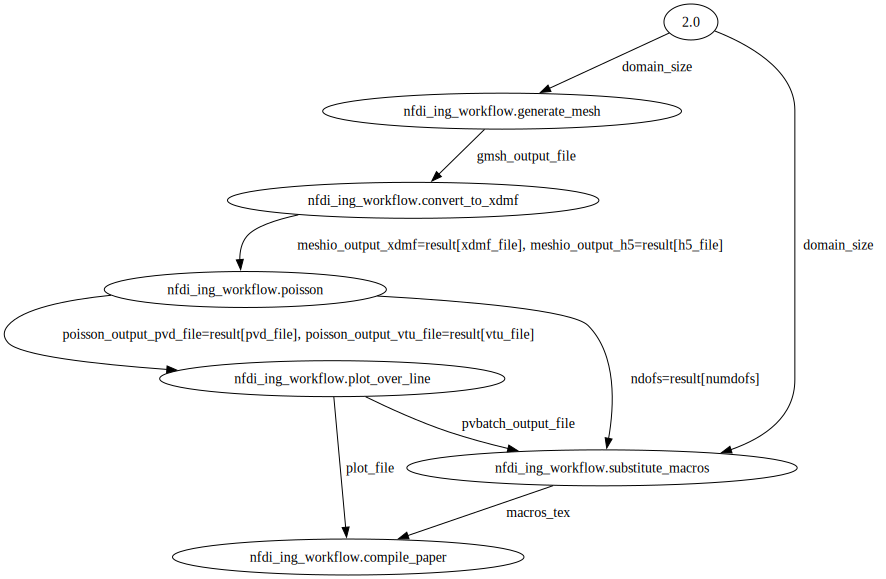

In [2]:
plot(file_name='workflow_nfdi.json')

## Aiida 

In [3]:
from python_workflow_definition.aiida import load_workflow_json

from aiida import load_profile
load_profile()

Profile<uuid='91b600f4af5f477facd703b8cfc12911' name='pwd'>

In [4]:
workgraph = load_workflow_json(file_name='workflow_nfdi.json')

In [5]:
# TODO: Create inputs rather than tasks out of data nodes
workgraph

NodeGraphWidget(settings={'minimap': True}, style={'width': '90%', 'height': '600px'}, value={'name': 'WorkGra…

In [6]:

workgraph.run()

04/13/2025 06:53:55 AM <98> aiida.orm.nodes.process.workflow.workchain.WorkChainNode: [REPORT] [2|WorkGraphEngine|continue_workgraph]: tasks ready to run: generate_mesh1
04/13/2025 06:53:57 AM <98> aiida.orm.nodes.process.workflow.workchain.WorkChainNode: [REPORT] [2|WorkGraphEngine|update_task_state]: Task: generate_mesh1, type: PyFunction, finished.
04/13/2025 06:53:57 AM <98> aiida.orm.nodes.process.workflow.workchain.WorkChainNode: [REPORT] [2|WorkGraphEngine|continue_workgraph]: tasks ready to run: convert_to_xdmf2
04/13/2025 06:53:59 AM <98> aiida.orm.nodes.process.workflow.workchain.WorkChainNode: [REPORT] [2|WorkGraphEngine|update_task_state]: Task: convert_to_xdmf2, type: PyFunction, finished.
04/13/2025 06:53:59 AM <98> aiida.orm.nodes.process.workflow.workchain.WorkChainNode: [REPORT] [2|WorkGraphEngine|continue_workgraph]: tasks ready to run: poisson3
04/13/2025 06:54:10 AM <98> aiida.orm.nodes.process.workflow.workchain.WorkChainNode: [REPORT] [2|WorkGraphEngine|update_tas

## executorlib

In [7]:
from executorlib import SingleNodeExecutor

In [8]:
from python_workflow_definition.executorlib import load_workflow_json

In [9]:
with SingleNodeExecutor(max_workers=1) as exe:
    result = load_workflow_json(file_name="workflow_nfdi.json", exe=exe).result()

In [10]:
result

'/home/jovyan/postprocessing/paper.pdf'

## Jobflow

In [11]:
from jobflow.managers.local import run_locally

/srv/conda/envs/notebook/lib/python3.12/site-packages/paramiko/pkey.py:82: CryptographyDeprecationWarning: TripleDES has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.TripleDES and will be removed from cryptography.hazmat.primitives.ciphers.algorithms in 48.0.0.
  "cipher": algorithms.TripleDES,
/srv/conda/envs/notebook/lib/python3.12/site-packages/paramiko/transport.py:253: CryptographyDeprecationWarning: TripleDES has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.TripleDES and will be removed from cryptography.hazmat.primitives.ciphers.algorithms in 48.0.0.
  "class": algorithms.TripleDES,


In [12]:
from python_workflow_definition.jobflow import load_workflow_json

In [13]:
flow = load_workflow_json(file_name="workflow_nfdi.json")

In [14]:
result = run_locally(flow)
result

2025-04-13 06:54:56,038 INFO Started executing jobs locally
2025-04-13 06:54:56,119 INFO Starting job - generate_mesh (36ef5c7e-130d-40a3-b2b0-daa2d35844ee)
2025-04-13 06:54:57,222 INFO Finished job - generate_mesh (36ef5c7e-130d-40a3-b2b0-daa2d35844ee)
2025-04-13 06:54:57,223 INFO Starting job - convert_to_xdmf (55a9847b-89ec-41dd-8ec3-569a20d9c567)
2025-04-13 06:54:58,553 INFO Finished job - convert_to_xdmf (55a9847b-89ec-41dd-8ec3-569a20d9c567)
2025-04-13 06:54:58,555 INFO Starting job - poisson (acbf7a8c-bd1d-4daf-9416-65e6dcf2d561)
2025-04-13 06:55:01,125 INFO Finished job - poisson (acbf7a8c-bd1d-4daf-9416-65e6dcf2d561)
2025-04-13 06:55:01,127 INFO Starting job - plot_over_line (acaf83ab-9473-46d6-a24a-81eecb96b8f5)
2025-04-13 06:55:02,734 INFO Finished job - plot_over_line (acaf83ab-9473-46d6-a24a-81eecb96b8f5)
2025-04-13 06:55:02,735 INFO Starting job - substitute_macros (2273024b-f920-4923-a85b-a6bc0474b2a4)
2025-04-13 06:55:03,542 INFO Finished job - substitute_macros (227302

{'36ef5c7e-130d-40a3-b2b0-daa2d35844ee': {1: Response(output='/home/jovyan/preprocessing/square.msh', detour=None, addition=None, replace=None, stored_data=None, stop_children=False, stop_jobflow=False, job_dir=PosixPath('/home/jovyan'))},
 '55a9847b-89ec-41dd-8ec3-569a20d9c567': {1: Response(output={'xdmf_file': '/home/jovyan/preprocessing/square.xdmf', 'h5_file': '/home/jovyan/preprocessing/square.h5'}, detour=None, addition=None, replace=None, stored_data=None, stop_children=False, stop_jobflow=False, job_dir=PosixPath('/home/jovyan'))},
 'acbf7a8c-bd1d-4daf-9416-65e6dcf2d561': {1: Response(output={'numdofs': 357, 'pvd_file': '/home/jovyan/processing/poisson.pvd', 'vtu_file': '/home/jovyan/processing/poisson000000.vtu'}, detour=None, addition=None, replace=None, stored_data=None, stop_children=False, stop_jobflow=False, job_dir=PosixPath('/home/jovyan'))},
 'acaf83ab-9473-46d6-a24a-81eecb96b8f5': {1: Response(output='/home/jovyan/postprocessing/plotoverline.csv', detour=None, additi

## pyiron

In [15]:
from pyiron_base import Project

In [16]:
from python_workflow_definition.pyiron_base import load_workflow_json

In [17]:
pr = Project("test")
pr.remove_jobs(recursive=True, silently=True)

0it [00:00, ?it/s]

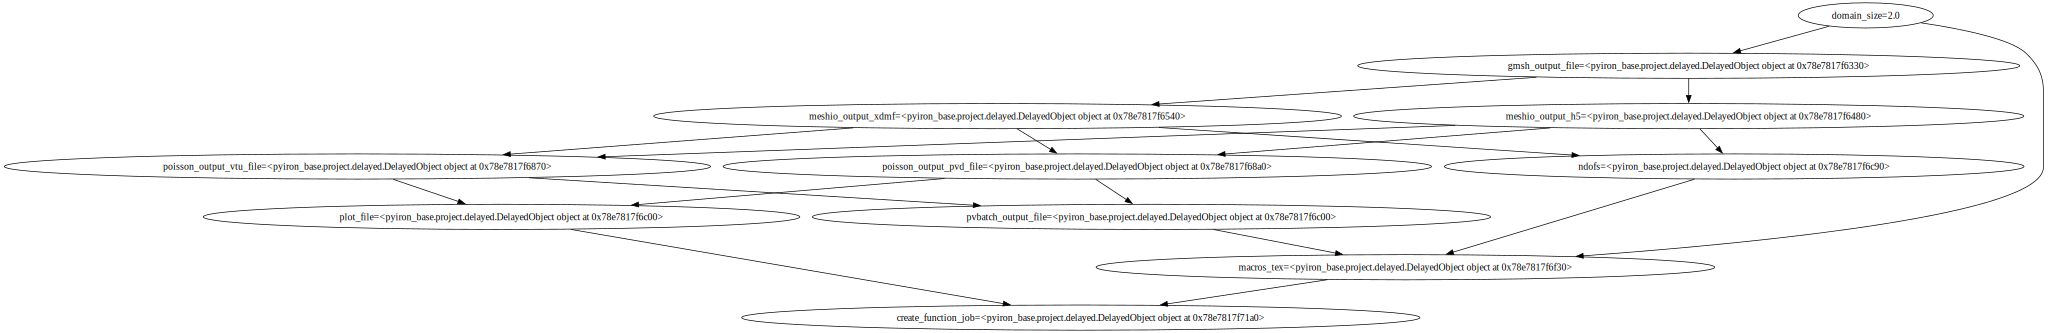

In [18]:
delayed_object_lst = load_workflow_json(project=pr, file_name="workflow_nfdi.json")
delayed_object_lst[-1].draw()

In [19]:
delayed_object_lst[-1].pull()

The job generate_mesh_0b48cf5155cd6802c17d20bb58104132 was saved and received the ID: 1
The job convert_to_xdmf_29ad6ec6927268429dc9aef8166fde43 was saved and received the ID: 2
The job poisson_a0224b23ceb2119d105a5d98ef37f93e was saved and received the ID: 3
The job plot_over_line_82b37a42e0747f11d9a7f6318f63ac6b was saved and received the ID: 4
The job substitute_macros_874fc185ecec04b4cb9537c58b7efb7b was saved and received the ID: 5
The job compile_paper_3cee534ffe692833d37faf1fd2170cb6 was saved and received the ID: 6


'/home/jovyan/postprocessing/paper.pdf'

In [20]:
pr.job_table()

,id,status,chemicalformula,job,subjob,projectpath,project,timestart,timestop,totalcputime,computer,hamilton,hamversion,parentid,masterid
0,1,finished,None,generate_mesh_0b48cf5155cd6802c17d20bb58104132,/generate_mesh_0b48cf5155cd6802c17d20bb58104132,None,/home/jovyan/test/,2025-04-13 06:55:06.270304,None,None,pyiron@jupyter-pyiron-dev-pyth-flow-definition-cmhhpfb1#1,PythonFunctionContainerJob,0.4,None,None
1,2,finished,None,convert_to_xdmf_29ad6ec6927268429dc9aef8166fde43,/convert_to_xdmf_29ad6ec6927268429dc9aef8166fde43,None,/home/jovyan/test/,2025-04-13 06:55:07.725818,None,None,pyiron@jupyter-pyiron-dev-pyth-flow-definition-cmhhpfb1#1,PythonFunctionContainerJob,0.4,None,None
2,3,finished,None,poisson_a0224b23ceb2119d105a5d98ef37f93e,/poisson_a0224b23ceb2119d105a5d98ef37f93e,None,/home/jovyan/test/,2025-04-13 06:55:09.188673,None,None,pyiron@jupyter-pyiron-dev-pyth-flow-definition-cmhhpfb1#1,PythonFunctionContainerJob,0.4,None,None
3,4,finished,None,plot_over_line_82b37a42e0747f11d9a7f6318f63ac6b,/plot_over_line_82b37a42e0747f11d9a7f6318f63ac6b,None,/home/jovyan/test/,2025-04-13 06:55:12.008854,None,None,pyiron@jupyter-pyiron-dev-pyth-flow-definition-cmhhpfb1#1,PythonFunctionContainerJob,0.4,None,None
4,5,finished,None,substitute_macros_874fc185ecec04b4cb9537c58b7efb7b,/substitute_macros_874fc185ecec04b4cb9537c58b7efb7b,None,/home/jovyan/test/,2025-04-13 06:55:13.518433,None,None,pyiron@jupyter-pyiron-dev-pyth-flow-definition-cmhhpfb1#1,PythonFunctionContainerJob,0.4,None,None
5,6,finished,None,compile_paper_3cee534ffe692833d37faf1fd2170cb6,/compile_paper_3cee534ffe692833d37faf1fd2170cb6,None,/home/jovyan/test/,2025-04-13 06:55:14.438081,None,None,pyiron@jupyter-pyiron-dev-pyth-flow-definition-cmhhpfb1#1,PythonFunctionContainerJob,0.4,None,None


## Python

In [21]:
from python_workflow_definition.purepython import load_workflow_json

In [22]:
load_workflow_json(file_name="workflow_nfdi.json")

'/home/jovyan/postprocessing/paper.pdf'